# Importing all the required libraries.

In [38]:
import csv
import librosa
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve

In [2]:
file_ravdess_mfcc_40_chroma_def=pd.read_csv('audio.csv')

In [3]:
file_ravdess_mfcc_40_chroma_def.head()

,name,label,emotion,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
0,03-01-01-01-01-01-01.wav,1,neutral,0.598800,0.002257,3435.943088,2600.929791,6264.656291,0.326237,-697.984245,...,0.570387,0.562410,0.551299,0.531241,0.589565,0.640624,0.644353,0.608717,0.611980,0.606167
1,03-01-01-01-01-02-01.wav,1,neutral,0.578452,0.002420,3231.037280,2646.981271,6162.832642,0.340786,-693.069755,...,0.586752,0.530952,0.529118,0.552281,0.497320,0.549519,0.584854,0.633122,0.632074,0.617527
2,03-01-01-01-02-01-01.wav,1,neutral,0.587585,0.002810,3203.154528,2605.181241,6117.338659,0.356861,-691.770194,...,0.579290,0.590824,0.573292,0.528130,0.516716,0.578961,0.639646,0.640274,0.563098,0.562465
3,03-01-01-01-02-02-01.wav,1,neutral,0.573247,0.002618,3080.483081,2644.191743,6094.210838,0.366200,-685.237871,...,0.518804,0.521994,0.584694,0.590593,0.537656,0.589734,0.611182,0.560056,0.568192,0.592452
4,03-01-02-01-01-01-01.wav,2,calm,0.561084,0.001654,3192.620354,2601.322629,6003.471105,0.313122,-727.317945,...,0.586327,0.547133,0.522434,0.539025,0.501785,0.554183,0.575118,0.618561,0.654716,0.552219


In [19]:
file_ravdess_mfcc_40_chroma_def.shape

(1440, 61)

In [20]:
file_ravdess_mfcc_chroma_40=pd.read_csv('myexp.csv')

In [21]:
file_ravdess_mfcc_chroma_40.shape

(1440, 89)

In [22]:
file_ravdess_mfcc_chroma_40.head()

,name,label,emotion,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,...,chroma31,chroma32,chroma33,chroma34,chroma35,chroma36,chroma37,chroma38,chroma39,chroma40
0,03-01-03-02-01-02-01.wav,3,happy,0.385386,0.008209,2592.308325,2360.097245,4995.771702,0.246548,-560.09265,...,0.464910,0.475772,0.437146,0.477294,0.468137,0.397129,0.374605,0.363818,0.353714,0.350808
1,03-01-03-02-02-02-01.wav,3,happy,0.399802,0.010222,3158.102896,2509.477352,5908.204274,0.304351,-539.44464,...,0.421390,0.443214,0.441170,0.453948,0.446627,0.423123,0.409154,0.380438,0.364385,0.329913
2,03-01-03-01-02-02-01.wav,3,happy,0.432610,0.003754,3155.010040,2500.076212,5856.358337,0.369135,-652.92870,...,0.398528,0.452733,0.453803,0.451015,0.450011,0.447997,0.456473,0.446581,0.428503,0.459803
3,03-01-05-01-01-02-01.wav,5,angry,0.389468,0.009704,3435.518747,2619.287507,6348.558278,0.303829,-526.54034,...,0.422416,0.412361,0.386799,0.383563,0.390801,0.372256,0.367946,0.360153,0.373736,0.369871
4,03-01-08-01-02-02-01.wav,8,surprised,0.491953,0.003929,3524.545799,2647.952102,6432.624460,0.284329,-666.63245,...,0.530399,0.520594,0.468319,0.440439,0.431363,0.439305,0.463814,0.481968,0.456423,0.451458


In [26]:
file_rav_sav_mfcc_chroma_40=pd.read_csv('myexpfinal.csv')

In [27]:
file_rav_sav_mfcc_chroma_40.shape

(1920, 89)

In [28]:
file_rav_sav_mfcc_chroma_40.head()

,name,label,emotion,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,...,chroma31,chroma32,chroma33,chroma34,chroma35,chroma36,chroma37,chroma38,chroma39,chroma40
0,03-01-03-02-01-02-01.wav,3,happy,0.385386,0.008209,2592.308325,2360.097245,4995.771702,0.246548,-560.09265,...,0.464910,0.475772,0.437146,0.477294,0.468137,0.397129,0.374605,0.363818,0.353714,0.350808
1,03-01-03-02-02-02-01.wav,3,happy,0.399802,0.010222,3158.102896,2509.477352,5908.204274,0.304351,-539.44464,...,0.421389,0.443214,0.441170,0.453948,0.446627,0.423123,0.409154,0.380438,0.364385,0.329913
2,03-01-03-01-02-02-01.wav,3,happy,0.432610,0.003754,3155.010040,2500.076212,5856.358337,0.369135,-652.92870,...,0.398528,0.452733,0.453803,0.451015,0.450011,0.447997,0.456473,0.446582,0.428503,0.459803
3,03-01-05-01-01-02-01.wav,5,angry,0.389468,0.009704,3435.518747,2619.287507,6348.558278,0.303829,-526.54034,...,0.422416,0.412361,0.386799,0.383563,0.390801,0.372256,0.367946,0.360153,0.373736,0.369871
4,03-01-08-01-02-02-01.wav,8,surprised,0.491953,0.003929,3524.545799,2647.952102,6432.624460,0.284329,-666.63245,...,0.530399,0.520594,0.468319,0.440439,0.431363,0.439305,0.463814,0.481968,0.456423,0.451458


In [34]:
file_sav_mfcc_40_chroma_def=pd.read_csv('save.csv')

In [35]:
file_sav_mfcc_40_chroma_def.shape

(480, 61)

In [36]:
file_sav_mfcc_40_chroma_def.head()

,name,label,emotion,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
0,a07.wav,5,angry,0.454161,0.219577,770.225570,1245.288464,1289.599609,0.014129,-310.76282,...,0.451283,0.532295,0.595957,0.585469,0.516790,0.472828,0.439147,0.379205,0.334979,0.369499
1,su11.wav,8,surprised,0.538299,0.124430,825.633466,1250.196555,1387.058989,0.013365,-374.00827,...,0.564124,0.609270,0.538288,0.526328,0.543785,0.556579,0.567067,0.560961,0.510373,0.461372
2,h04.wav,3,happy,0.337713,0.199768,960.704483,1194.943258,1768.713379,0.020119,-283.00680,...,0.206731,0.241154,0.295855,0.345946,0.383043,0.354404,0.354393,0.401778,0.450322,0.436226
3,d15.wav,7,disgust,0.392497,0.094476,915.547283,1299.673530,1818.558757,0.011486,-402.85272,...,0.475527,0.512193,0.450575,0.375740,0.357397,0.337109,0.310256,0.309857,0.310629,0.341707
4,f15.wav,6,fearful,0.349216,0.180558,945.162458,1198.264363,1706.207275,0.014992,-317.88593,...,0.247705,0.278932,0.365006,0.551702,0.657871,0.574245,0.423041,0.272397,0.187965,0.183048


In [39]:
file_rav_sav_mfcc_40_chroma_def=pd.read_csv('rav_sav.csv')

In [40]:
file_rav_sav_mfcc_40_chroma_def.shape

(1920, 61)

In [42]:
file_rav_sav_mfcc_40_chroma_def.head()

,name,label,emotion,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
0,03-01-01-01-01-01-01.wav,1,neutral,0.598800,0.002257,3435.943088,2600.929791,6264.656291,0.326237,-697.984245,...,0.570387,0.562410,0.551299,0.531241,0.589565,0.640624,0.644353,0.608717,0.611980,0.606167
1,03-01-01-01-01-02-01.wav,1,neutral,0.578452,0.002420,3231.037280,2646.981271,6162.832642,0.340786,-693.069755,...,0.586752,0.530952,0.529118,0.552281,0.497320,0.549519,0.584854,0.633122,0.632074,0.617527
2,03-01-01-01-02-01-01.wav,1,neutral,0.587585,0.002810,3203.154528,2605.181241,6117.338659,0.356861,-691.770194,...,0.579290,0.590824,0.573292,0.528130,0.516716,0.578961,0.639646,0.640274,0.563098,0.562465
3,03-01-01-01-02-02-01.wav,1,neutral,0.573247,0.002618,3080.483081,2644.191743,6094.210838,0.366200,-685.237871,...,0.518804,0.521994,0.584694,0.590593,0.537656,0.589734,0.611182,0.560056,0.568192,0.592452
4,03-01-02-01-01-01-01.wav,2,calm,0.561084,0.001654,3192.620354,2601.322629,6003.471105,0.313122,-727.317945,...,0.586327,0.547133,0.522434,0.539025,0.501785,0.554183,0.575118,0.618561,0.654716,0.552219


# RAVDESS DATASET

In [4]:
# file with mfcc 40 features and chroma 12.
data=file_ravdess_mfcc_40_chroma_def

In [5]:
data.shape

(1440, 61)

In [6]:
data.head()

,name,label,emotion,chroma_stft_mean,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
0,03-01-01-01-01-01-01.wav,1,neutral,0.598800,0.002257,3435.943088,2600.929791,6264.656291,0.326237,-697.984245,...,0.570387,0.562410,0.551299,0.531241,0.589565,0.640624,0.644353,0.608717,0.611980,0.606167
1,03-01-01-01-01-02-01.wav,1,neutral,0.578452,0.002420,3231.037280,2646.981271,6162.832642,0.340786,-693.069755,...,0.586752,0.530952,0.529118,0.552281,0.497320,0.549519,0.584854,0.633122,0.632074,0.617527
2,03-01-01-01-02-01-01.wav,1,neutral,0.587585,0.002810,3203.154528,2605.181241,6117.338659,0.356861,-691.770194,...,0.579290,0.590824,0.573292,0.528130,0.516716,0.578961,0.639646,0.640274,0.563098,0.562465
3,03-01-01-01-02-02-01.wav,1,neutral,0.573247,0.002618,3080.483081,2644.191743,6094.210838,0.366200,-685.237871,...,0.518804,0.521994,0.584694,0.590593,0.537656,0.589734,0.611182,0.560056,0.568192,0.592452
4,03-01-02-01-01-01-01.wav,2,calm,0.561084,0.001654,3192.620354,2601.322629,6003.471105,0.313122,-727.317945,...,0.586327,0.547133,0.522434,0.539025,0.501785,0.554183,0.575118,0.618561,0.654716,0.552219


# Data-Copy

In [7]:
data_copy=data.copy()

In [8]:
data_copy.shape

(1440, 61)

# Splitting into X and Y

In [9]:
X=data_copy.drop('name label emotion chroma_stft_mean'.split(),axis=1)

In [10]:
X.shape

(1440, 57)

In [11]:
X.head()

,rmse_mean,spec_cent_mean,spec_bw_mean,rolloff_mean,zcr_mean,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,chroma3,chroma4,chroma5,chroma6,chroma7,chroma8,chroma9,chroma10,chroma11,chroma12
0,0.002257,3435.943088,2600.929791,6264.656291,0.326237,-697.984245,55.228483,0.323863,12.775377,7.396147,...,0.570387,0.562410,0.551299,0.531241,0.589565,0.640624,0.644353,0.608717,0.611980,0.606167
1,0.002420,3231.037280,2646.981271,6162.832642,0.340786,-693.069755,55.734569,-1.919739,16.408997,8.449357,...,0.586752,0.530952,0.529118,0.552281,0.497320,0.549519,0.584854,0.633122,0.632074,0.617527
2,0.002810,3203.154528,2605.181241,6117.338659,0.356861,-691.770194,58.350647,-0.165160,13.952124,5.053322,...,0.579290,0.590824,0.573292,0.528130,0.516716,0.578961,0.639646,0.640274,0.563098,0.562465
3,0.002618,3080.483081,2644.191743,6094.210838,0.366200,-685.237871,56.236698,2.453112,13.566656,6.701948,...,0.518804,0.521994,0.584694,0.590593,0.537656,0.589734,0.611182,0.560056,0.568192,0.592452
4,0.001654,3192.620354,2601.322629,6003.471105,0.313122,-727.317945,62.764397,2.751275,15.473257,7.763116,...,0.586327,0.547133,0.522434,0.539025,0.501785,0.554183,0.575118,0.618561,0.654716,0.552219


In [12]:
Y=data['label']

In [13]:
Y.shape

(1440,)

In [14]:
Y

0       1
1       1
2       1
3       1
4       2
       ..
1435    8
1436    8
1437    8
1438    8
1439    8
Name: label, Length: 1440, dtype: int64

# Train-Test-Split

In [230]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.20)

In [231]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1152, 57)
(288, 57)
(1152,)
(288,)


# Standarization

In [232]:
scaler=StandardScaler()

In [233]:
X_scaled_train=scaler.fit_transform(X_train)

In [234]:
X_scaled_test=scaler.transform(X_test)

# Logistic Regression

In [235]:
logistic=LogisticRegression()

In [236]:
logistic.fit(X_scaled_train,Y_train)

/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/akansh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [237]:
Y_pred=logistic.predict(X_scaled_test)

In [238]:
print("Logistic Regression Test Accuracy {:.2f}%".format(logistic.score(X_scaled_test, Y_test)*100))

Logistic Regression Test Accuracy 52.78%


In [252]:
Y_pred_prob=logistic.predict_proba(X_scaled_test)

In [247]:
Y_test_lr=Y_test

In [248]:

encoder = LabelEncoder()
Y_test_lr =  encoder.fit_transform(Y_test_lr)
Y_test_lr

array([4, 2, 2, 6, 3, 1, 7, 7, 1, 3, 4, 1, 1, 3, 4, 4, 7, 1, 1, 2, 7, 1,
       6, 5, 1, 2, 0, 3, 3, 5, 1, 3, 6, 1, 4, 4, 5, 5, 0, 0, 4, 3, 2, 5,
       7, 5, 2, 7, 3, 2, 4, 5, 2, 5, 6, 2, 3, 5, 5, 1, 4, 7, 2, 6, 6, 5,
       2, 2, 4, 1, 3, 3, 3, 7, 4, 3, 1, 2, 6, 1, 1, 4, 6, 6, 6, 5, 1, 0,
       4, 5, 4, 5, 7, 2, 2, 1, 3, 5, 3, 5, 5, 3, 0, 0, 6, 7, 4, 2, 6, 6,
       2, 0, 3, 6, 5, 7, 4, 1, 5, 5, 6, 3, 5, 2, 4, 4, 1, 1, 4, 3, 4, 3,
       2, 6, 2, 4, 7, 3, 5, 4, 5, 2, 7, 0, 1, 7, 6, 7, 1, 4, 2, 0, 6, 0,
       1, 4, 1, 4, 1, 6, 0, 4, 3, 7, 6, 6, 5, 1, 4, 6, 0, 6, 2, 1, 4, 5,
       2, 5, 1, 1, 0, 0, 5, 2, 6, 0, 6, 2, 6, 0, 6, 5, 7, 2, 4, 4, 7, 4,
       1, 6, 7, 4, 7, 6, 0, 6, 6, 1, 1, 6, 0, 5, 3, 1, 4, 4, 2, 7, 7, 3,
       4, 5, 1, 5, 7, 1, 4, 3, 3, 1, 4, 5, 4, 6, 0, 7, 7, 0, 0, 7, 6, 3,
       1, 2, 1, 3, 7, 2, 5, 1, 2, 6, 2, 6, 4, 2, 1, 7, 1, 2, 3, 7, 7, 4,
       5, 6, 1, 6, 5, 1, 6, 1, 3, 1, 0, 6, 2, 2, 3, 2, 7, 2, 4, 7, 5, 5,
       2, 1])

In [249]:
data = Y_test_lr
data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)

[4 2 2 6 3 1 7 7 1 3 4 1 1 3 4 4 7 1 1 2 7 1 6 5 1 2 0 3 3 5 1 3 6 1 4 4 5
 5 0 0 4 3 2 5 7 5 2 7 3 2 4 5 2 5 6 2 3 5 5 1 4 7 2 6 6 5 2 2 4 1 3 3 3 7
 4 3 1 2 6 1 1 4 6 6 6 5 1 0 4 5 4 5 7 2 2 1 3 5 3 5 5 3 0 0 6 7 4 2 6 6 2
 0 3 6 5 7 4 1 5 5 6 3 5 2 4 4 1 1 4 3 4 3 2 6 2 4 7 3 5 4 5 2 7 0 1 7 6 7
 1 4 2 0 6 0 1 4 1 4 1 6 0 4 3 7 6 6 5 1 4 6 0 6 2 1 4 5 2 5 1 1 0 0 5 2 6
 0 6 2 6 0 6 5 7 2 4 4 7 4 1 6 7 4 7 6 0 6 6 1 1 6 0 5 3 1 4 4 2 7 7 3 4 5
 1 5 7 1 4 3 3 1 4 5 4 6 0 7 7 0 0 7 6 3 1 2 1 3 7 2 5 1 2 6 2 6 4 2 1 7 1
 2 3 7 7 4 5 6 1 6 5 1 6 1 3 1 0 6 2 2 3 2 7 2 4 7 5 5 2 1]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [250]:
Y_test_one_hot_lr=encoded

/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


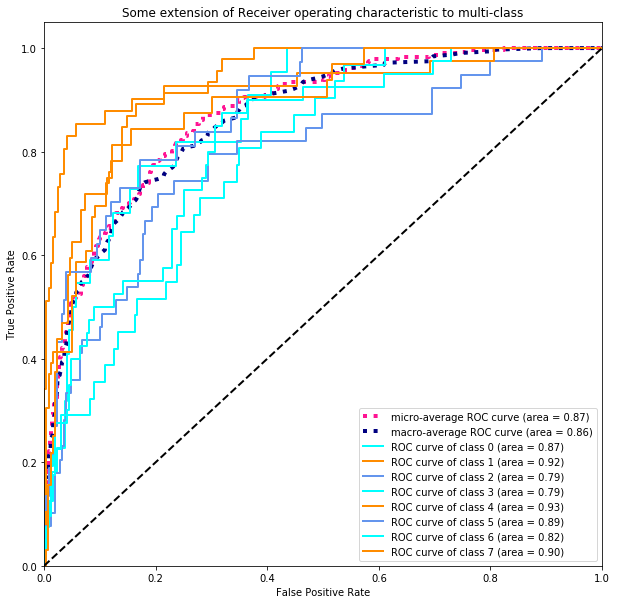

In [255]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes=8
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_one_hot_lr[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_one_hot.ravel(), Y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1,figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()




# Random Forest

In [169]:
forest = RandomForestClassifier(criterion= 'entropy', n_estimators= 800, max_depth= 20, min_samples_split= 5, random_state=101)

In [170]:
forest.fit(X_scaled_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [171]:
forest_pred = forest.predict(X_scaled_test)

In [172]:
print("Random Forest Test Accuracy {:.2f}%".format(forest.score(X_scaled_test, Y_test)*100))

Random Forest Test Accuracy 61.81%


# MLP Classifier

In [318]:
model=MLPClassifier(alpha=0.01, batch_size=16, epsilon=1e-08, hidden_layer_sizes=(600,), learning_rate='constant', max_iter=500)

In [319]:
model.fit(X_scaled_train,Y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=16, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(600,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [320]:
Y_pred=model.predict(X_scaled_test)

In [321]:
accuracy=accuracy_score(y_true=Y_test,y_pred=Y_pred)

In [322]:
accuracy

0.6875

# CNN

In [20]:
#tried the encoder of sklearn and compared with manual encoding. results had no huge difference.
encoder = LabelEncoder()
Y =  encoder.fit_transform(Y)
Y

array([0, 0, 0, ..., 7, 7, 7])

In [176]:
X_cnn=data_copy.drop('name label emotion chroma_stft_mean rmse_mean spec_cent_mean spec_bw_mean rolloff_mean zcr_mean chroma1 chroma2 chroma3 chroma4 chroma5 chroma6 chroma7 chroma8 chroma9 chroma10 chroma11 chroma12'.split(),axis=1)

In [ ]:
chroma_stft_mean rmse_mean spec_cent_mean spec_bw_mean rolloff_mean zcr_mean chroma1 chroma2 chroma3 chroma4 chroma5 chroma6 chroma7 chroma8 chroma9 chroma10 chroma11 chroma12

In [177]:
X_cnn.shape

(1440, 40)

In [178]:
Y.shape

(1440,)

In [179]:
X_train_cnn,X_test_cnn,Y_train_cnn,Y_test_cnn=train_test_split(X_cnn,Y,random_state=1,stratify=Y,test_size=0.20)

In [180]:
scaler=StandardScaler()

In [181]:
X_scaled_train_cnn=scaler.fit_transform(X_train_cnn)

In [182]:
X_scaled_test_cnn=scaler.transform(X_test_cnn)

In [183]:
X_expanded_scaled_train_cnn = np.expand_dims(X_scaled_train_cnn, axis=2)
X_expanded_scaled_test_cnn = np.expand_dims(X_scaled_test_cnn, axis=2)

In [184]:
X_expanded_scaled_train_cnn.shape, X_expanded_scaled_test_cnn.shape

((1152, 40, 1), (288, 40, 1))

In [262]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 8,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Conv1D(256, 8,padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(5)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.0002, rho=0.9, decay=0.0)

In [263]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [264]:
cnnhistory=model.fit(X_expanded_scaled_train_cnn, Y_train_cnn, batch_size=128, epochs=300, validation_data=(X_expanded_scaled_test_cnn, Y_test_cnn))




Train on 1152 samples, validate on 288 samples
Epoch 1/300
1152/1152 [==============================] - 1s 742us/step - loss: 2.0431 - accuracy: 0.1649 - val_loss: 2.0114 - val_accuracy: 0.2257
Epoch 2/300
1152/1152 [==============================] - 1s 591us/step - loss: 1.9914 - accuracy: 0.2370 - val_loss: 1.9805 - val_accuracy: 0.2257
Epoch 3/300
1152/1152 [==============================] - 1s 603us/step - loss: 1.9380 - accuracy: 0.2491 - val_loss: 1.9528 - val_accuracy: 0.2153
Epoch 4/300
1152/1152 [==============================] - 1s 596us/step - loss: 1.9051 - accuracy: 0.2474 - val_loss: 1.9274 - val_accuracy: 0.2431
Epoch 5/300
1152/1152 [==============================] - 1s 601us/step - loss: 1.8813 - accuracy: 0.2656 - val_loss: 1.9085 - val_accuracy: 0.2743
Epoch 6/300
1152/1152 [==============================] - 1s 664us/step - loss: 1.8489 - accuracy: 0.2847 - val_loss: 1.8935 - val_accuracy: 0.2326
Epoch 7/300
1152/1152 [==============================] - 1s 765us/step 

1152/1152 [==============================] - 1s 511us/step - loss: 0.9213 - accuracy: 0.6901 - val_loss: 1.4714 - val_accuracy: 0.4688
Epoch 57/300
1152/1152 [==============================] - 1s 492us/step - loss: 0.9630 - accuracy: 0.6667 - val_loss: 1.3319 - val_accuracy: 0.5104
Epoch 58/300
1152/1152 [==============================] - 1s 483us/step - loss: 0.8967 - accuracy: 0.7014 - val_loss: 1.3840 - val_accuracy: 0.5000
Epoch 59/300
1152/1152 [==============================] - 1s 507us/step - loss: 0.8747 - accuracy: 0.7135 - val_loss: 1.3205 - val_accuracy: 0.5243
Epoch 60/300
1152/1152 [==============================] - 1s 494us/step - loss: 0.8400 - accuracy: 0.7300 - val_loss: 1.4048 - val_accuracy: 0.5035
Epoch 61/300
1152/1152 [==============================] - 1s 487us/step - loss: 0.8876 - accuracy: 0.7161 - val_loss: 1.3402 - val_accuracy: 0.5139
Epoch 62/300
1152/1152 [==============================] - 1s 491us/step - loss: 0.8568 - accuracy: 0.7057 - val_loss: 1.3699 

1152/1152 [==============================] - 1s 514us/step - loss: 0.4256 - accuracy: 0.8915 - val_loss: 1.1880 - val_accuracy: 0.6007
Epoch 112/300
1152/1152 [==============================] - 1s 517us/step - loss: 0.3231 - accuracy: 0.9158 - val_loss: 1.5489 - val_accuracy: 0.5347
Epoch 113/300
1152/1152 [==============================] - 1s 509us/step - loss: 0.3854 - accuracy: 0.8898 - val_loss: 1.3108 - val_accuracy: 0.5521
Epoch 114/300
1152/1152 [==============================] - 1s 513us/step - loss: 0.4067 - accuracy: 0.8707 - val_loss: 1.2181 - val_accuracy: 0.5729
Epoch 115/300
1152/1152 [==============================] - 1s 515us/step - loss: 0.3233 - accuracy: 0.9097 - val_loss: 1.3988 - val_accuracy: 0.5417
Epoch 116/300
1152/1152 [==============================] - 1s 513us/step - loss: 0.3657 - accuracy: 0.9019 - val_loss: 1.4948 - val_accuracy: 0.5382
Epoch 117/300
1152/1152 [==============================] - 1s 503us/step - loss: 0.4117 - accuracy: 0.8776 - val_loss: 1

1152/1152 [==============================] - 1s 514us/step - loss: 0.1995 - accuracy: 0.9436 - val_loss: 1.6354 - val_accuracy: 0.5764
Epoch 167/300
1152/1152 [==============================] - 1s 510us/step - loss: 0.1230 - accuracy: 0.9757 - val_loss: 1.2325 - val_accuracy: 0.6215
Epoch 168/300
1152/1152 [==============================] - 1s 511us/step - loss: 0.1277 - accuracy: 0.9644 - val_loss: 1.6654 - val_accuracy: 0.5590
Epoch 169/300
1152/1152 [==============================] - 1s 511us/step - loss: 0.1578 - accuracy: 0.9653 - val_loss: 1.7272 - val_accuracy: 0.5521
Epoch 170/300
1152/1152 [==============================] - 1s 498us/step - loss: 0.2143 - accuracy: 0.9366 - val_loss: 1.1944 - val_accuracy: 0.6285
Epoch 171/300
1152/1152 [==============================] - 1s 512us/step - loss: 0.0863 - accuracy: 0.9852 - val_loss: 1.3009 - val_accuracy: 0.6458
Epoch 172/300
1152/1152 [==============================] - 1s 514us/step - loss: 0.2429 - accuracy: 0.9436 - val_loss: 1

1152/1152 [==============================] - 1s 519us/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 1.2432 - val_accuracy: 0.6736
Epoch 222/300
1152/1152 [==============================] - 1s 526us/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 1.2414 - val_accuracy: 0.6667
Epoch 223/300
1152/1152 [==============================] - 1s 674us/step - loss: 0.2630 - accuracy: 0.9219 - val_loss: 2.1509 - val_accuracy: 0.5174
Epoch 224/300
1152/1152 [==============================] - 1s 667us/step - loss: 0.0401 - accuracy: 0.9948 - val_loss: 1.2624 - val_accuracy: 0.6493
Epoch 225/300
1152/1152 [==============================] - 1s 698us/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 1.2738 - val_accuracy: 0.6667
Epoch 226/300
1152/1152 [==============================] - 1s 733us/step - loss: 0.0228 - accuracy: 0.9991 - val_loss: 1.3302 - val_accuracy: 0.6493
Epoch 227/300
1152/1152 [==============================] - 1s 664us/step - loss: 0.0210 - accuracy: 0.9974 - val_loss: 1

1152/1152 [==============================] - 1s 514us/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 1.3961 - val_accuracy: 0.6632
Epoch 277/300
1152/1152 [==============================] - 1s 513us/step - loss: 0.0093 - accuracy: 0.9983 - val_loss: 1.3925 - val_accuracy: 0.6910
Epoch 278/300
1152/1152 [==============================] - 1s 511us/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.4071 - val_accuracy: 0.6806
Epoch 279/300
1152/1152 [==============================] - 1s 506us/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.4076 - val_accuracy: 0.6771
Epoch 280/300
1152/1152 [==============================] - 1s 514us/step - loss: 0.3048 - accuracy: 0.9314 - val_loss: 1.5635 - val_accuracy: 0.6528
Epoch 281/300
1152/1152 [==============================] - 1s 518us/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1.4333 - val_accuracy: 0.6701
Epoch 282/300
1152/1152 [==============================] - 1s 509us/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1

In [192]:
Y_pred_cnn=model.predict(X_expanded_scaled_test_cnn)

In [193]:
Y_pred_cnn

array([[3.7549962e-03, 2.9462240e-05, 8.0681257e-03, ..., 3.6238724e-01,
        6.1993349e-01, 1.5973045e-03],
       [2.3382361e-05, 9.9486512e-01, 1.4221152e-05, ..., 1.1398712e-06,
        3.7053172e-04, 4.3716502e-09],
       [3.7605935e-01, 5.9828752e-01, 3.1923456e-04, ..., 2.2451448e-05,
        4.4568964e-08, 4.0364898e-06],
       ...,
       [2.0381541e-10, 8.8870689e-11, 7.7053792e-06, ..., 9.9997151e-01,
        6.8708690e-14, 3.5069447e-12],
       [4.2688031e-09, 2.6116376e-13, 2.5288697e-08, ..., 1.5057358e-10,
        1.4989283e-05, 1.5269503e-09],
       [1.5404274e-10, 1.2941937e-15, 4.8135635e-06, ..., 6.7869523e-11,
        1.1765663e-08, 2.0181853e-08]], dtype=float32)

In [194]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
# define example
data = Y_test_cnn
data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)
# # invert encoding
# inverted = argmax(encoded[0])
# print(inverted)


[6 3 1 3 4 5 3 3 4 7 7 6 1 1 1 2 2 0 5 6 6 4 2 6 5 6 7 6 3 6 1 3 7 6 0 2 3
 1 0 6 3 4 1 7 3 5 1 5 0 4 5 2 5 0 1 3 5 3 1 6 6 2 2 4 6 7 3 5 3 4 1 4 4 6
 6 5 2 1 1 7 6 5 2 5 5 3 0 3 1 4 4 6 4 7 3 1 2 2 7 0 6 5 0 6 4 3 3 7 0 2 1
 6 6 2 7 4 1 6 5 7 6 4 3 7 6 1 7 4 3 2 5 7 1 0 4 4 6 3 2 2 1 5 0 7 7 0 6 1
 1 0 7 5 5 1 4 3 6 2 2 7 0 2 5 5 6 3 7 4 1 5 1 5 5 5 2 2 4 7 7 5 6 2 1 6 7
 6 5 6 4 5 4 4 2 7 6 7 5 5 6 6 7 3 4 4 6 3 1 1 5 2 4 7 5 1 6 4 4 2 1 3 7 3
 3 3 0 4 2 7 4 3 2 7 0 2 1 7 2 3 0 5 1 1 0 6 7 7 5 4 7 3 3 3 5 4 4 4 2 2 4
 1 1 5 2 4 7 7 0 2 2 6 7 5 1 2 5 2 2 3 3 1 7 2 1 3 3 5 4 4]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [195]:
Y_test_one_hot_cnn=encoded

In [196]:
print(Y_pred_cnn.shape)
print(Y_test_one_hot_cnn.shape)

(288, 8)
(288, 8)


/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


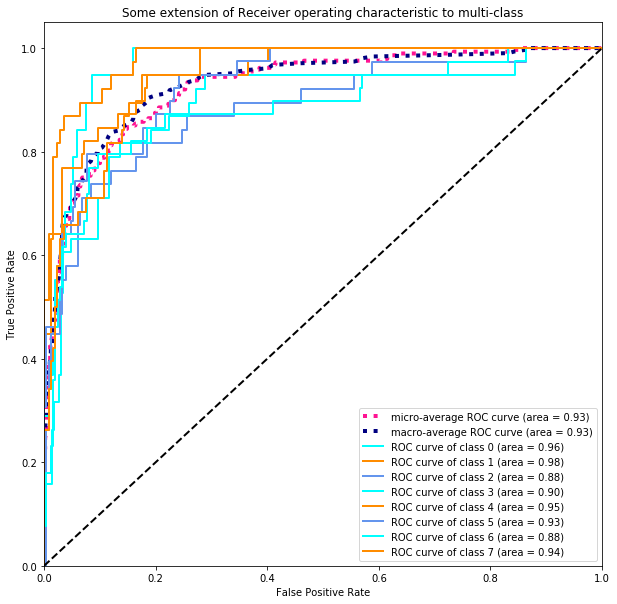

In [197]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes=8
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_one_hot_cnn[:, i], Y_pred_cnn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_one_hot_cnn.ravel(), Y_pred_cnn.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1,figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()




# Support Vector Machine

In [203]:
svm_model=SVC(kernel='rbf',C=8,probability=True).fit(X_scaled_train,Y_train)

In [204]:
Y_pred=svm_model.predict(X_scaled_test)

In [208]:
Y_pred_prob=svm_model.predict_proba(X_scaled_test)

In [206]:
accuracy=svm_model.score(X_scaled_test,Y_test)

In [207]:
accuracy

0.7013888888888888

In [239]:
Y_test_svm=Y_test

In [240]:

encoder = LabelEncoder()
Y_test_svm =  encoder.fit_transform(Y_test_svm)
Y_test_svm

array([4, 2, 2, 6, 3, 1, 7, 7, 1, 3, 4, 1, 1, 3, 4, 4, 7, 1, 1, 2, 7, 1,
       6, 5, 1, 2, 0, 3, 3, 5, 1, 3, 6, 1, 4, 4, 5, 5, 0, 0, 4, 3, 2, 5,
       7, 5, 2, 7, 3, 2, 4, 5, 2, 5, 6, 2, 3, 5, 5, 1, 4, 7, 2, 6, 6, 5,
       2, 2, 4, 1, 3, 3, 3, 7, 4, 3, 1, 2, 6, 1, 1, 4, 6, 6, 6, 5, 1, 0,
       4, 5, 4, 5, 7, 2, 2, 1, 3, 5, 3, 5, 5, 3, 0, 0, 6, 7, 4, 2, 6, 6,
       2, 0, 3, 6, 5, 7, 4, 1, 5, 5, 6, 3, 5, 2, 4, 4, 1, 1, 4, 3, 4, 3,
       2, 6, 2, 4, 7, 3, 5, 4, 5, 2, 7, 0, 1, 7, 6, 7, 1, 4, 2, 0, 6, 0,
       1, 4, 1, 4, 1, 6, 0, 4, 3, 7, 6, 6, 5, 1, 4, 6, 0, 6, 2, 1, 4, 5,
       2, 5, 1, 1, 0, 0, 5, 2, 6, 0, 6, 2, 6, 0, 6, 5, 7, 2, 4, 4, 7, 4,
       1, 6, 7, 4, 7, 6, 0, 6, 6, 1, 1, 6, 0, 5, 3, 1, 4, 4, 2, 7, 7, 3,
       4, 5, 1, 5, 7, 1, 4, 3, 3, 1, 4, 5, 4, 6, 0, 7, 7, 0, 0, 7, 6, 3,
       1, 2, 1, 3, 7, 2, 5, 1, 2, 6, 2, 6, 4, 2, 1, 7, 1, 2, 3, 7, 7, 4,
       5, 6, 1, 6, 5, 1, 6, 1, 3, 1, 0, 6, 2, 2, 3, 2, 7, 2, 4, 7, 5, 5,
       2, 1])

In [241]:
data = Y_test_svm
data = array(data)
print(data)
# one hot encode
encoded = to_categorical(data)
print(encoded)

[4 2 2 6 3 1 7 7 1 3 4 1 1 3 4 4 7 1 1 2 7 1 6 5 1 2 0 3 3 5 1 3 6 1 4 4 5
 5 0 0 4 3 2 5 7 5 2 7 3 2 4 5 2 5 6 2 3 5 5 1 4 7 2 6 6 5 2 2 4 1 3 3 3 7
 4 3 1 2 6 1 1 4 6 6 6 5 1 0 4 5 4 5 7 2 2 1 3 5 3 5 5 3 0 0 6 7 4 2 6 6 2
 0 3 6 5 7 4 1 5 5 6 3 5 2 4 4 1 1 4 3 4 3 2 6 2 4 7 3 5 4 5 2 7 0 1 7 6 7
 1 4 2 0 6 0 1 4 1 4 1 6 0 4 3 7 6 6 5 1 4 6 0 6 2 1 4 5 2 5 1 1 0 0 5 2 6
 0 6 2 6 0 6 5 7 2 4 4 7 4 1 6 7 4 7 6 0 6 6 1 1 6 0 5 3 1 4 4 2 7 7 3 4 5
 1 5 7 1 4 3 3 1 4 5 4 6 0 7 7 0 0 7 6 3 1 2 1 3 7 2 5 1 2 6 2 6 4 2 1 7 1
 2 3 7 7 4 5 6 1 6 5 1 6 1 3 1 0 6 2 2 3 2 7 2 4 7 5 5 2 1]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [242]:
Y_test_one_hot_svm=encoded

/home/akansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


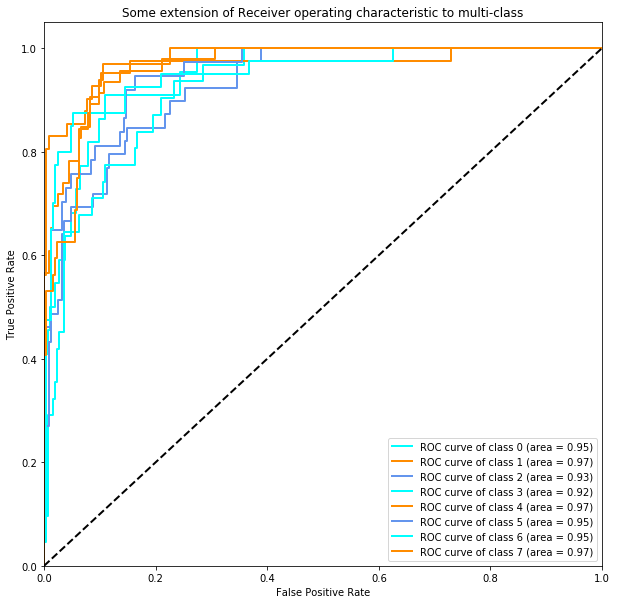

In [243]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
n_classes=8
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_one_hot_svm[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_one_hot.ravel(), Y_pred_prob.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1,figsize=(10,10))
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()




# K Nearest Neighbours

In [244]:
knn=KNeighborsClassifier(n_neighbors=2,weights='distance',p=1).fit(X_scaled_train,Y_train)

In [245]:
accuracy=knn.score(X_scaled_test,Y_test)

In [246]:
accuracy

0.6111111111111112

# Naive-Bayes

In [607]:
gnb=GaussianNB().fit(X_scaled_train,Y_train)

In [608]:
Y_pred=gnb.predict(X_scaled_test)

In [609]:
accuracy=gnb.score(X_scaled_test,Y_test)

In [610]:
accuracy

0.3645833333333333

# Accuracies obtained by all models.

In [678]:
print('RAVDESS DATASET')
print('Logistic Regression : 52.78 %')
print('Random Forest       : 61.81 % ')
print('MLP Classifier      : 68.75 %')
print('CNN                 : 70.83 %')
print('SVM                 : 70.13 %')
print('KNN                 : 61.11 %')
print('Naive-Bayes         : 36.45 %')

RAVDESS DATASET
Logistic Regression : 52.78 %
Random Forest       : 61.81 % 
MLP Classifier      : 68.75 %
CNN                 : 70.83 %
SVM                 : 70.13 %
KNN                 : 61.11 %
Naive-Bayes         : 36.45 %


In [679]:
print('SAVVEE DATASET')
print('Logistic Regression : 70.83 %')
print('Random Forest       : 68.75 % ')
print('MLP Classifier      : 75.00 %')
print('CNN                 : 61.46 %')
print('SVM                 : 70.83 %')
print('KNN                 : 63.54 %')
print('Naive-Bayes         : 48.95 %')

SAVVEE DATASET
Logistic Regression : 70.83 %
Random Forest       : 68.75 % 
MLP Classifier      : 75.00 %
CNN                 : 61.46 %
SVM                 : 70.83 %
KNN                 : 63.54 %
Naive-Bayes         : 48.95 %


In [680]:
print('RAVDESS AND SAVVEE COMBINED DATASET')
print('Logistic Regression : 44.01 %')
print('Random Forest       : 60.68 % ')
print('MLP Classifier      : 68.22 %')
print('CNN                 : 65.46 %')
print('SVM                 : 68.22 %')
print('KNN                 : 58.33 %')
print('Naive-Bayes         : 29.42 %')

RAVDESS AND SAVVEE COMBINED DATASET
Logistic Regression : 44.01 %
Random Forest       : 60.68 % 
MLP Classifier      : 68.22 %
CNN                 : 65.46 %
SVM                 : 68.22 %
KNN                 : 58.33 %
Naive-Bayes         : 29.42 %
